## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [8]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
#df.rename(columns={'m':'DATE', 'TagName':'TAG', 'Unnamed: 2': 'POSTS'}, inplace=True)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [11]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [13]:
df.tail()

,DATE,TAG,POSTS
2756,2025-02-01 00:00:00,php,357
2757,2025-02-01 00:00:00,python,2255
2758,2025-02-01 00:00:00,r,509
2759,2025-02-01 00:00:00,ruby,51
2760,2025-02-01 00:00:00,swift,311


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [16]:
df.shape

(2761, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [19]:
df.count()

DATE     2761
TAG      2761
POSTS    2761
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [154]:
clean_df.groupby('TAG').sum('POSTS').idxmax()

POSTS    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [138]:
clean_df.groupby('TAG').count().idxmin()

DATE     go
POSTS    go
dtype: object

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [144]:
# Let's take a closer look at the 'DATE' column in our DataFrame. 
# We can use the double square bracket notation to look at the second entry in the column: 
print(df['DATE'][1])
# Alternatively, for column names no spaces, we can also use the dot-notation:
print(type(df.DATE[1]))

2008-08-01 00:00:00


str

In [146]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [148]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [150]:
# Sometimes you want to convert your DataFrame so that each category has its own column.
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [22]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01 00:00:00,28.0,320.0,1640.0,753.0,104.0,NaN,1122.0,630.0,129.0,474.0,534.0,6.0,285.0,NaN
2008-10-01 00:00:00,16.0,303.0,1984.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01 00:00:00,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01 00:00:00,89.0,464.0,1585.0,915.0,84.0,177.0,1506.0,1872.0,21.0,649.0,3472.0,784.0,63.0,457.0
2024-11-01 00:00:00,98.0,401.0,1352.0,846.0,56.0,124.0,1257.0,1629.0,20.0,540.0,3134.0,692.0,75.0,386.0
2024-12-01 00:00:00,89.0,327.0,1087.0,686.0,42.0,114.0,1163.0,1385.0,24.0,428.0,2692.0,548.0,52.0,315.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [156]:
reshaped_df.count()

TAG
assembly      199
c             199
c#            200
c++           199
delphi        199
go            184
java          199
javascript    199
perl          199
php           199
python        199
r             197
ruby          199
swift         190
dtype: int64

In [163]:
reshaped_df.fillna(0, inplace=True) 
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1122.0,630.0,129.0,474.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,303.0,1984.0,805.0,112.0,0.0,1145.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,89.0,464.0,1585.0,915.0,84.0,177.0,1506.0,1872.0,21.0,649.0,3472.0,784.0,63.0,457.0
2024-11-01,98.0,401.0,1352.0,846.0,56.0,124.0,1257.0,1629.0,20.0,540.0,3134.0,692.0,75.0,386.0
2024-12-01,89.0,327.0,1087.0,686.0,42.0,114.0,1163.0,1385.0,24.0,428.0,2692.0,548.0,52.0,315.0


In [165]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

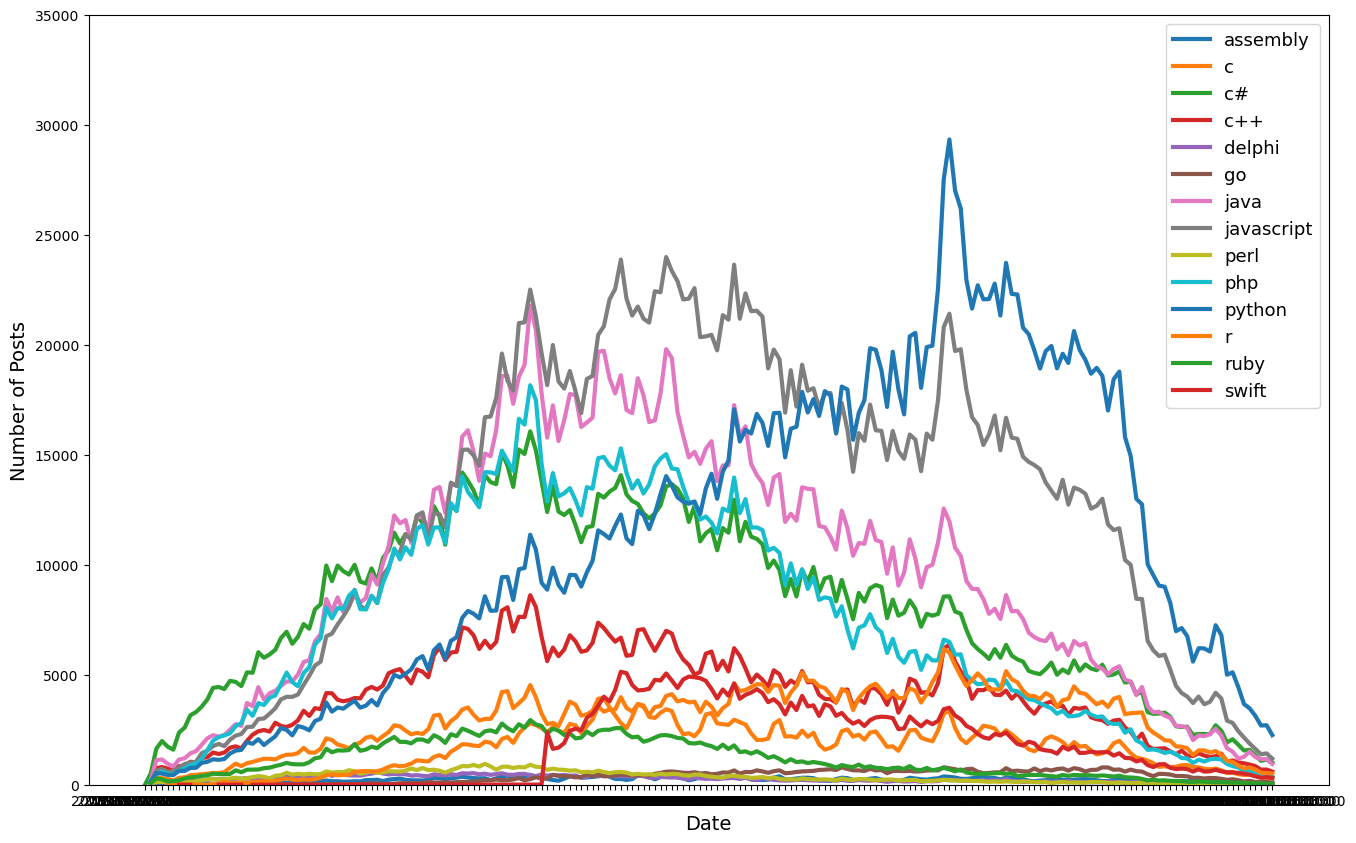

In [40]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt.xlim(reshaped_df.index.min(), reshaped_df.index.max())
# plt.plot(reshaped_df.index, reshaped_df.java)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=13) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

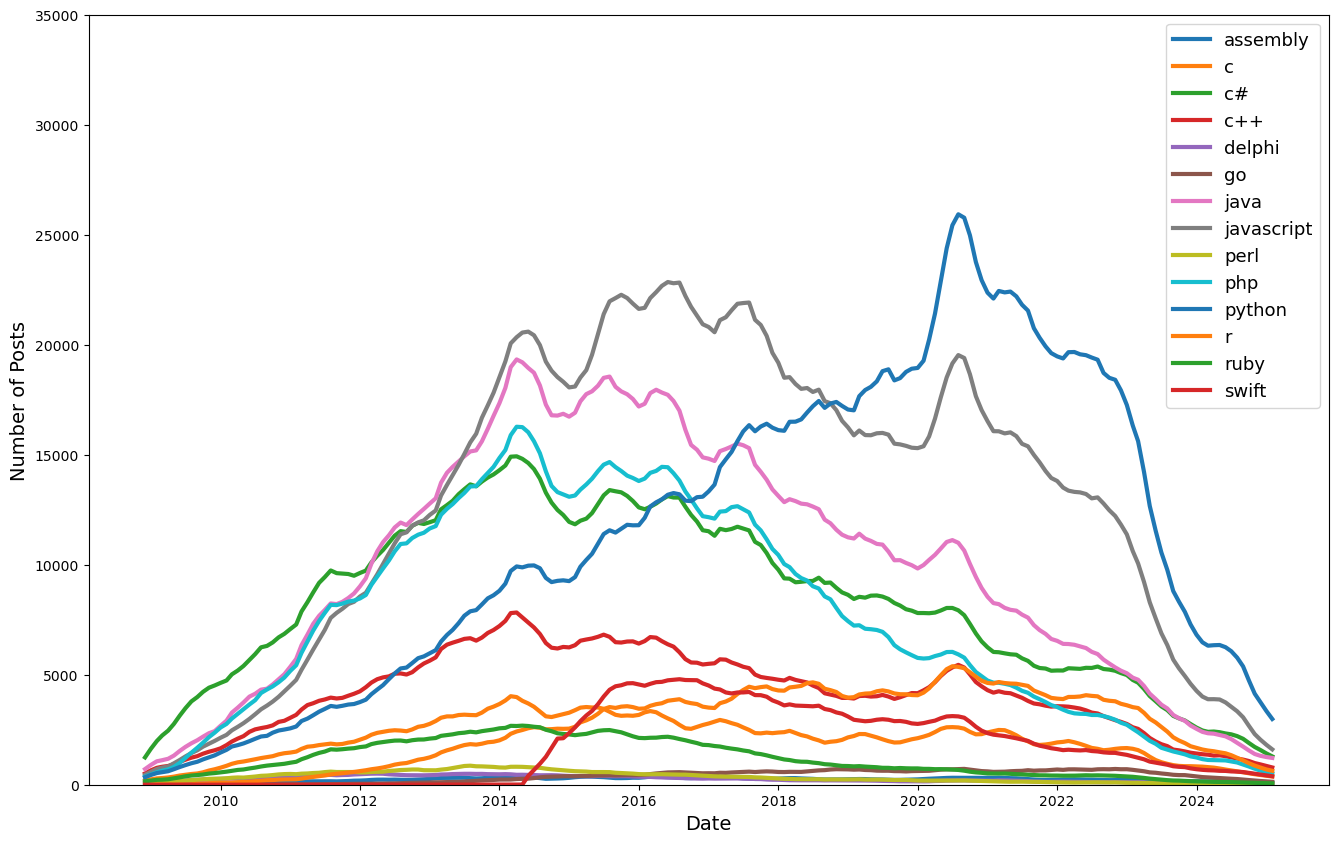

In [194]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plt.plot(reshaped_df.index, reshaped_df.java)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, roll_df[column], linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=13) 

In [ ]:
# used .groupby() to explore the number of posts and entries per programming language

# converted strings to Datetime objects with to_datetime() for easier plotting

# reshaped our DataFrame by converting categories to columns using .pivot()

# used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

# created (multiple) line charts using .plot() with a for-loop

# styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

# added a legend to tell apart which line is which by colour

# smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.